In [1]:
g(z) = 1 ./ (1 .+ ℯ.^(-z))

h(θ, x) = g(transpose(θ) * x)

J(θ, x, y, m) = -sum(y .* log.(h(θ, x)) .+ (1 .- y) .* log.(1 .- h(θ, x))) / m 

∇J(θ, x, y, m) = (transpose((h(θ, x) - y) * transpose(x))) ./ m

function descent(θ, α, ϵ, x, y)
    iterations = 0
    m = length(θ)
    
    while true
        iterations += 1
        nθ = θ - α * ∇J(θ, x, y, m)

        err = J(nθ, x, y, m)
        if err < ϵ || isnan(err)
            break
        end
        θ = nθ
    end

    θ, iterations, J(θ, x, y, m)
end

descent (generic function with 1 method)

In [5]:
θ = [1 1]
y = [0 0 1 1]
x = [
    1 1
    1 2
    1 4
    1 5
]

4×2 Array{Int64,2}:
 1  1
 1  2
 1  4
 1  5

In [8]:
fittedTheta, iterations = @time descent(transpose(θ), 0.1, 0.01, transpose(x), y)

  0.051658 seconds (298.40 k allocations: 23.059 MiB, 25.40% gc time)


([-13.659; 4.65825], 9625, 0.010000204378944798)

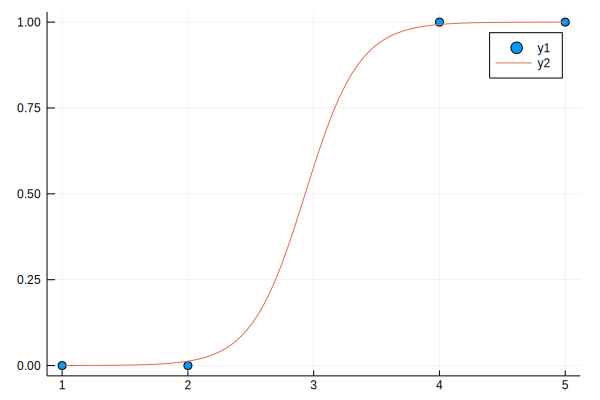

In [9]:
using Plots
gr()
plot(x[:, 2:end], transpose(y), seriestype=:scatter)
manyx = range(1, stop=5, length=1000)
manyx = hcat(ones(length(manyx)), manyx)
plot!(manyx[:, 2:end], transpose(h(fittedTheta, transpose(manyx))))